# 0. Import Libraries

In [315]:
import azure.functions as func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import date, timedelta
from shared_code import utils
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Initialize Storage Account

In [212]:
azure_utils = utils.AzureUtils()
secret_client = azure_utils.initialize_key_vault()

sa_secret = azure_utils.get_key_vault_secret(secret_client, 'sa-booli')
sa_name = azure_utils.get_key_vault_secret(secret_client, 'sa-name')
storage_account = azure_utils.initialize_storage_account_ad(sa_secret.value, sa_name.value)

# 2. Loading Data

In [213]:
utils_DataFactory = utils.DataFactory()
data_cleaning = utils_DataFactory.get_formatter("Cleaning")

## All objects

In [293]:
columns_to_drop = ["floor", "soldPriceAbsoluteDiff", "soldPricePercentageDiff", "__typename", "listPrice", "rooms", "soldSqmPrice", "livingArea", "rent"]
non_numeric_columns = ["streetAddress", "objectType", "descriptiveAreaName", "soldPriceType", "soldDate", "url", "__typename"]
columns_to_rename = {
    "soldPrice.raw": "soldPriceInSek",
    "floor.raw": "floorNumber",
    "rent.raw": "rentInSek",
    "soldSqmPrice.raw": "soldSqmPriceInSek",
    "soldPriceAbsoluteDiff.raw": "soldPriceVsListPriceDiffInSek",
    "soldPricePercentageDiff.raw": "soldPriceVsListPriceDiffInPercentage",
    "listPrice.raw": "listPriceInSek",
    "livingArea.raw": "livingAreaInSqm",
    "rooms.raw": "numberOfRooms"
}

df = (
    azure_utils.ingest_raw_data("sold/all/Sold_Lägenhet")
    .pipe(data_cleaning.drop_dataframe_columns, columns_to_drop)
    .pipe(data_cleaning.set_dtype_to_numeric, non_numeric_columns)
    .pipe(data_cleaning.change_timestamp_format, "soldDate")
    .pipe(data_cleaning.rename_df_columns, columns_to_rename)
)
df["dateKey"] = df.soldDate.dt.to_period("M")
df.head()

,booliId,streetAddress,constructionYear,objectType,descriptiveAreaName,soldPriceType,daysActive,soldDate,latitude,longitude,url,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,dateKey
0,1297209,Drottningholmsvägen 48,2011.0,Lägenhet,St Göran,Slutpris,18.0,2012-11-06,59.332038,18.022488,/bostad/342585,2650000,2193.0,63095.0,0.0,0.0,2650000.0,42.0,2.0,NaN,2012-11
1,1309519,Lilla Västerbron 6,2009.0,Lägenhet,Fredhäll,Slutpris,13.0,2012-11-21,59.331375,18.023321,/annons/1309519,2650000,2989.0,63095.0,150000.0,6.0,2500000.0,42.0,2.0,NaN,2012-11
2,1313807,Igeldammsgatan 20,1932.0,Lägenhet,St Göran,Slutpris,13.0,2012-11-28,59.336983,18.024736,/annons/1313807,2110000,1708.0,57027.0,110000.0,5.5,2000000.0,37.0,1.5,2.0,2012-11
3,1284962,Hjärnegatan 4,NaN,Lägenhet,Kungsholmen,Slutpris,13.0,2012-10-17,59.332541,18.042303,/annons/1284962,2970000,2809.0,54000.0,-30000.0,-1.0,3000000.0,55.0,2.0,4.0,2012-10
4,1282231,Vänskapsvägen 55,NaN,Lägenhet,Stora Essingen,Slutpris,25.0,2012-10-24,59.321561,17.988416,/bostad/792125,2000000,3698.0,41667.0,-200000.0,-9.1,2200000.0,48.0,2.5,3.0,2012-10


## Balcony objects

In [215]:
columns_to_drop = ["floor", "soldPriceAbsoluteDiff", "soldPricePercentageDiff", "__typename", "listPrice", "rooms", "soldSqmPrice", "livingArea", "rent"]
non_numeric_columns = ["streetAddress", "objectType", "descriptiveAreaName", "soldPriceType", "soldDate", "url", "__typename"]
columns_to_rename = {
    "soldPrice.raw": "soldPriceInSek",
    "floor.raw": "floorNumber",
    "rent.raw": "rentInSek",
    "soldSqmPrice.raw": "soldSqmPriceInSek",
    "soldPriceAbsoluteDiff.raw": "soldPriceVsListPriceDiffInSek",
    "soldPricePercentageDiff.raw": "soldPriceVsListPriceDiffInPercentage",
    "listPrice.raw": "listPriceInSek",
    "livingArea.raw": "livingAreaInSqm",
    "rooms.raw": "numberOfRooms"
}

df_balcony = azure_utils.ingest_raw_data("sold/balcony/Sold_Lägenhet")
df_balcony["hasBalcony"] = 1
df_balcony = df_balcony[["booliId", "hasBalcony"]]
df_balcony.head()

,booliId,hasBalcony
0,4831335,1
1,4843799,1
2,4837855,1
3,4839334,1
4,4831628,1


## Elevator objects

In [216]:
columns_to_drop = ["floor", "soldPriceAbsoluteDiff", "soldPricePercentageDiff", "__typename", "listPrice", "rooms", "soldSqmPrice", "livingArea", "rent"]
non_numeric_columns = ["streetAddress", "objectType", "descriptiveAreaName", "soldPriceType", "soldDate", "url", "__typename"]
columns_to_rename = {
    "soldPrice.raw": "soldPriceInSek",
    "floor.raw": "floorNumber",
    "rent.raw": "rentInSek",
    "soldSqmPrice.raw": "soldSqmPriceInSek",
    "soldPriceAbsoluteDiff.raw": "soldPriceVsListPriceDiffInSek",
    "soldPricePercentageDiff.raw": "soldPriceVsListPriceDiffInPercentage",
    "listPrice.raw": "listPriceInSek",
    "livingArea.raw": "livingAreaInSqm",
    "rooms.raw": "numberOfRooms"
}

df_elevator = azure_utils.ingest_raw_data("sold/elevator/Sold_Lägenhet")
df_elevator["hasElevator"] = 1
df_elevator = df_elevator[["booliId", "hasElevator"]]
df_elevator.head()

,booliId,hasElevator
0,1297209,1
1,1309519,1
2,1313807,1
3,1284962,1
4,1282231,1


## Fireplace objects

In [217]:
columns_to_drop = ["floor", "soldPriceAbsoluteDiff", "soldPricePercentageDiff", "__typename", "listPrice", "rooms", "soldSqmPrice", "livingArea", "rent"]
non_numeric_columns = ["streetAddress", "objectType", "descriptiveAreaName", "soldPriceType", "soldDate", "url", "__typename"]
columns_to_rename = {
    "soldPrice.raw": "soldPriceInSek",
    "floor.raw": "floorNumber",
    "rent.raw": "rentInSek",
    "soldSqmPrice.raw": "soldSqmPriceInSek",
    "soldPriceAbsoluteDiff.raw": "soldPriceVsListPriceDiffInSek",
    "soldPricePercentageDiff.raw": "soldPriceVsListPriceDiffInPercentage",
    "listPrice.raw": "listPriceInSek",
    "livingArea.raw": "livingAreaInSqm",
    "rooms.raw": "numberOfRooms"
}

df_fireplace = azure_utils.ingest_raw_data("sold/fireplace/Sold_Lägenhet")
df_fireplace["hasFireplace"] = 1
df_fireplace = df_fireplace[["booliId", "hasFireplace"]]
df_fireplace.head()

,booliId,hasFireplace
0,4831335,1
1,4831788,1
2,4846903,1
3,4780240,1
4,4843374,1


## Inflation

In [308]:
df_inflation = pd.read_pickle("CPIF.pkl").reset_index()
df_inflation["dateKey"] = df_inflation["key"].dt.to_period("M")
df_inflation = df_inflation.iloc[:, [3,4]]
df_inflation.columns = ["CPIF", "dateKey"]

## Mergin dataframes

In [311]:
# df = df.merge(df_balcony, on = "booliId", how = "left").merge(df_elevator, on = "booliId", how = "left").merge(df_fireplace, on = "booliId", how = "left")
df = df.merge(df_inflation, on = "dateKey", how = "left")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2400\731390703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

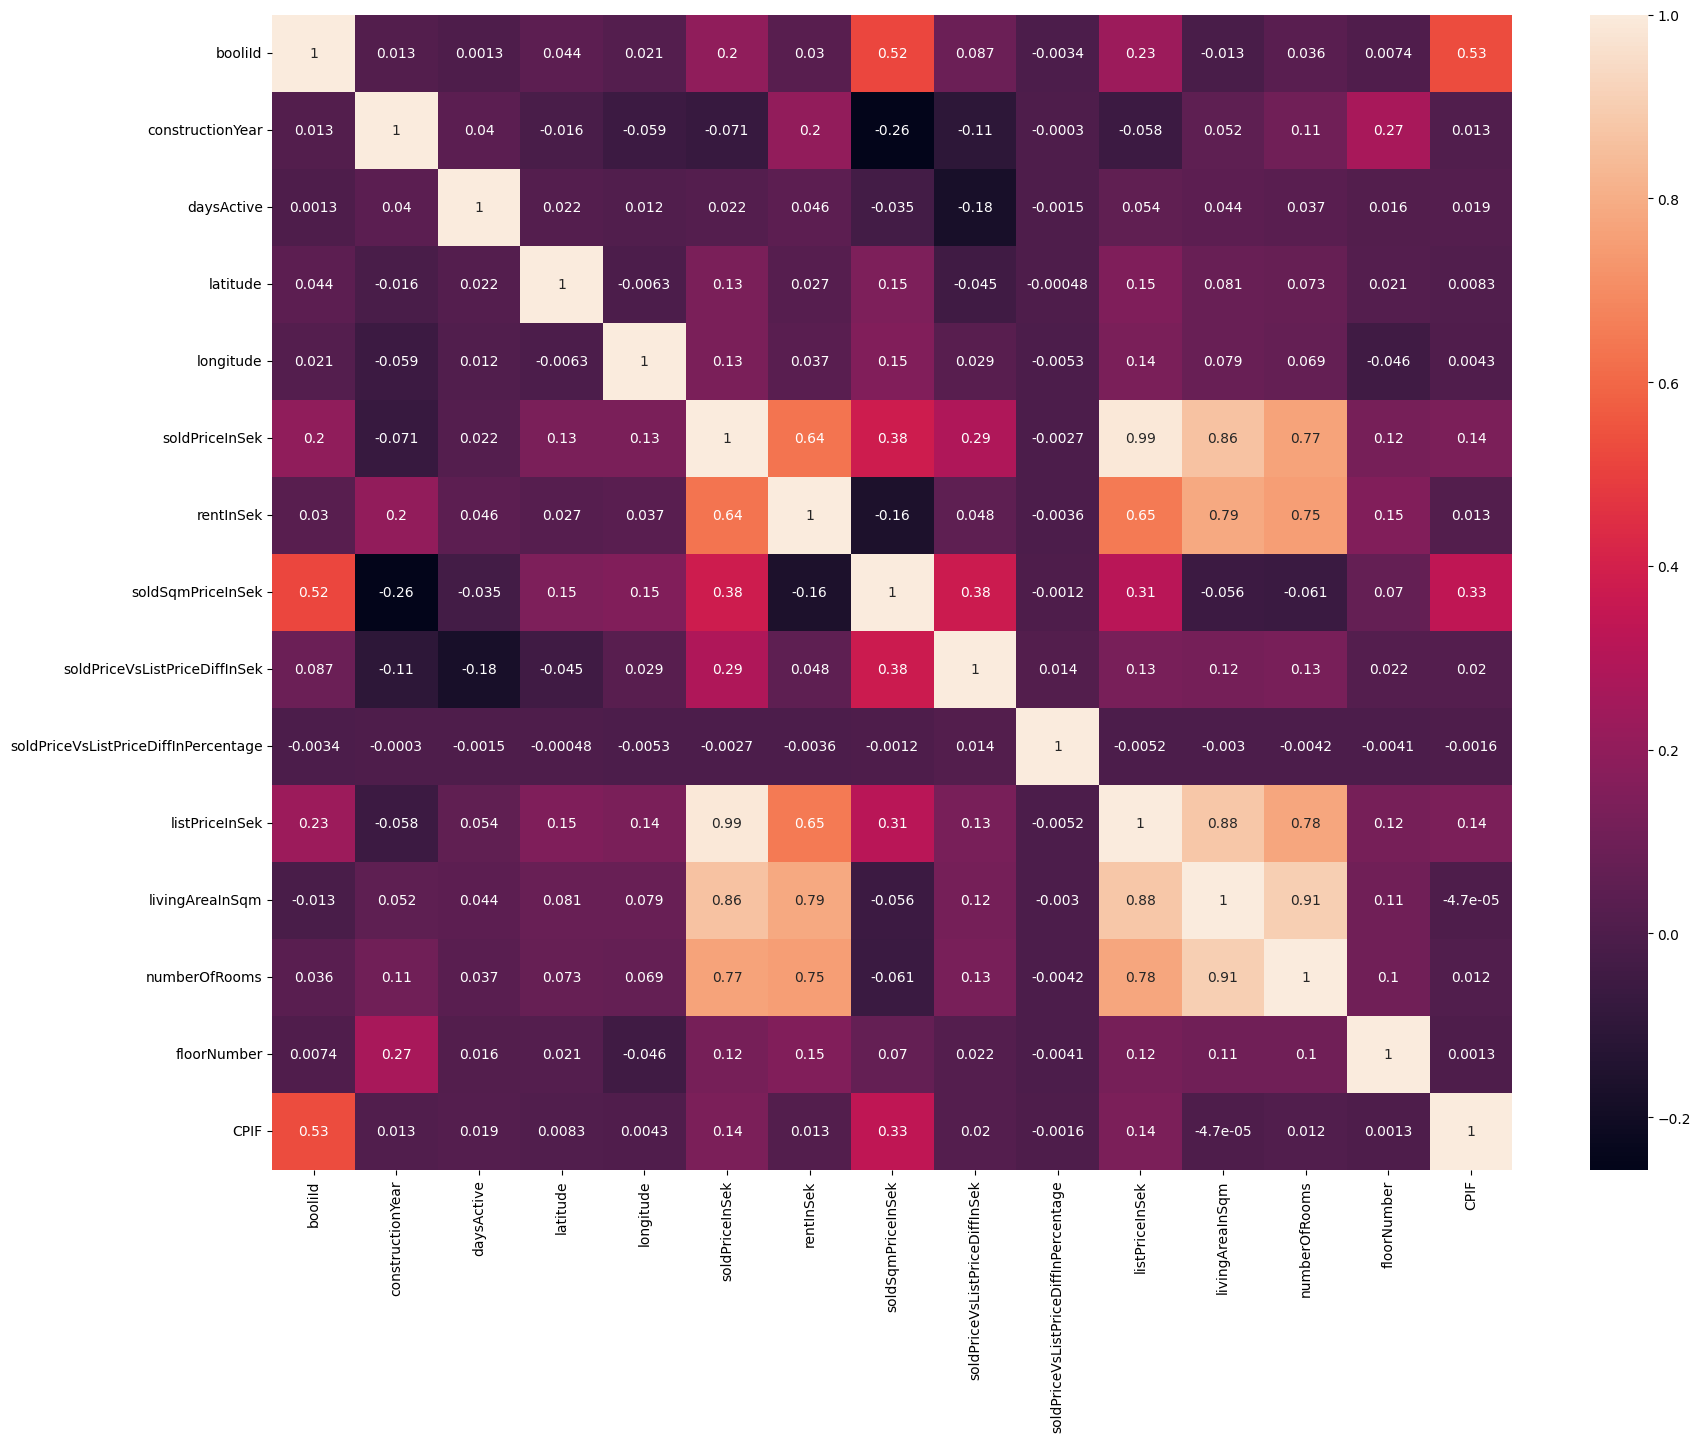

In [318]:
correlation = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(correlation, xticklabels = correlation.columns.values, yticklabels = correlation.columns.values, annot = True, annot_kws = {"size": 10})

# 3. General Statistics of the Dataframe

## Data Types

In [219]:
data_cleaning.get_data_types(df)

,Data Type
booliId,int64
streetAddress,object
constructionYear,float64
objectType,object
descriptiveAreaName,object
soldPriceType,object
daysActive,float64
soldDate,datetime64[ns]
latitude,float64
longitude,float64


## Statistical Overview

In [220]:
df.describe()

,booliId,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
count,9.282000e+04,84628.000000,92266.000000,92820.000000,92820.000000,9.282000e+04,91768.000000,92677.000000,8.939900e+04,8.939900e+04,8.941200e+04,92677.000000,92573.000000,83614.000000
mean,3.083999e+06,1934.243217,21.040286,59.331941,18.052927,5.442165e+06,2738.255514,92437.157029,4.368958e+05,1.520547e+03,4.932026e+06,59.277494,2.272002,2.994107
std,1.127711e+06,37.051866,39.596657,0.013085,0.028020,3.429558e+06,1271.871029,21608.136264,5.262918e+05,4.515097e+05,3.146957e+06,30.241923,1.022304,2.155644
min,-1.015519e+07,1300.000000,0.000000,59.279156,17.873617,4.000000e+04,1.000000,10000.000000,-6.029043e+06,-7.430000e+01,0.000000e+00,9.400000,1.000000,-3.000000
25%,2.037978e+06,1912.000000,11.000000,59.318600,18.033190,3.330000e+06,1861.000000,77895.000000,1.050000e+05,2.600000e+00,2.975000e+06,38.000000,2.000000,1.500000
50%,3.264016e+06,1930.000000,13.000000,59.334938,18.051445,4.500000e+06,2488.000000,90909.000000,3.750000e+05,9.600000e+00,3.995000e+06,53.000000,2.000000,3.000000
75%,4.046358e+06,1941.000000,19.000000,59.342256,18.077690,6.500000e+06,3389.000000,105000.000000,6.500000e+05,1.660000e+01,5.950000e+06,74.000000,3.000000,4.000000
max,4.854521e+06,2023.000000,2832.000000,59.373271,18.142138,1.350000e+08,35803.000000,755556.000000,1.500000e+07,1.349999e+08,7.500000e+07,970.000000,19.000000,99.900000


## Missing Values

In [221]:
def get_missing_values_percent(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    dropped_columns = missing_data[missing_data.Percent >= 0.5].index
    print(missing_data)

In [222]:
get_missing_values_percent(df)

                                      Total   Percent
floorNumber                            9206  0.099181
constructionYear                       8192  0.088257
soldPriceVsListPriceDiffInPercentage   3421  0.036856
soldPriceVsListPriceDiffInSek          3421  0.036856
listPriceInSek                         3408  0.036716
rentInSek                              1052  0.011334
daysActive                              554  0.005969
numberOfRooms                           247  0.002661
livingAreaInSqm                         143  0.001541
soldSqmPriceInSek                       143  0.001541
soldPriceInSek                            0  0.000000
booliId                                   0  0.000000
streetAddress                             0  0.000000
longitude                                 0  0.000000
latitude                                  0  0.000000
soldDate                                  0  0.000000
soldPriceType                             0  0.000000
descriptiveAreaName         

# 4. Data Visualization

## Distributions

In [223]:
def plot_distribution(dataframe, column, ax, bins_ = 100):
    dataframe[column].plot(kind = "hist", bins = bins_, ax = ax, color = "lightblue", ec = "black", linewidth = 1)
    
    min_ylim, max_ylim = ax.get_ylim()
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.set_xlabel(column)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax.ticklabel_format(style = "plain", axis = "x")
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    ax.axvline(mean, color = "k", linestyle = "--", linewidth = 1)
    ax.set_title("Histogram of {}: $\mu$ = {:.2f}, $\sigma$ = {:.2f}".format(column, mean, std))

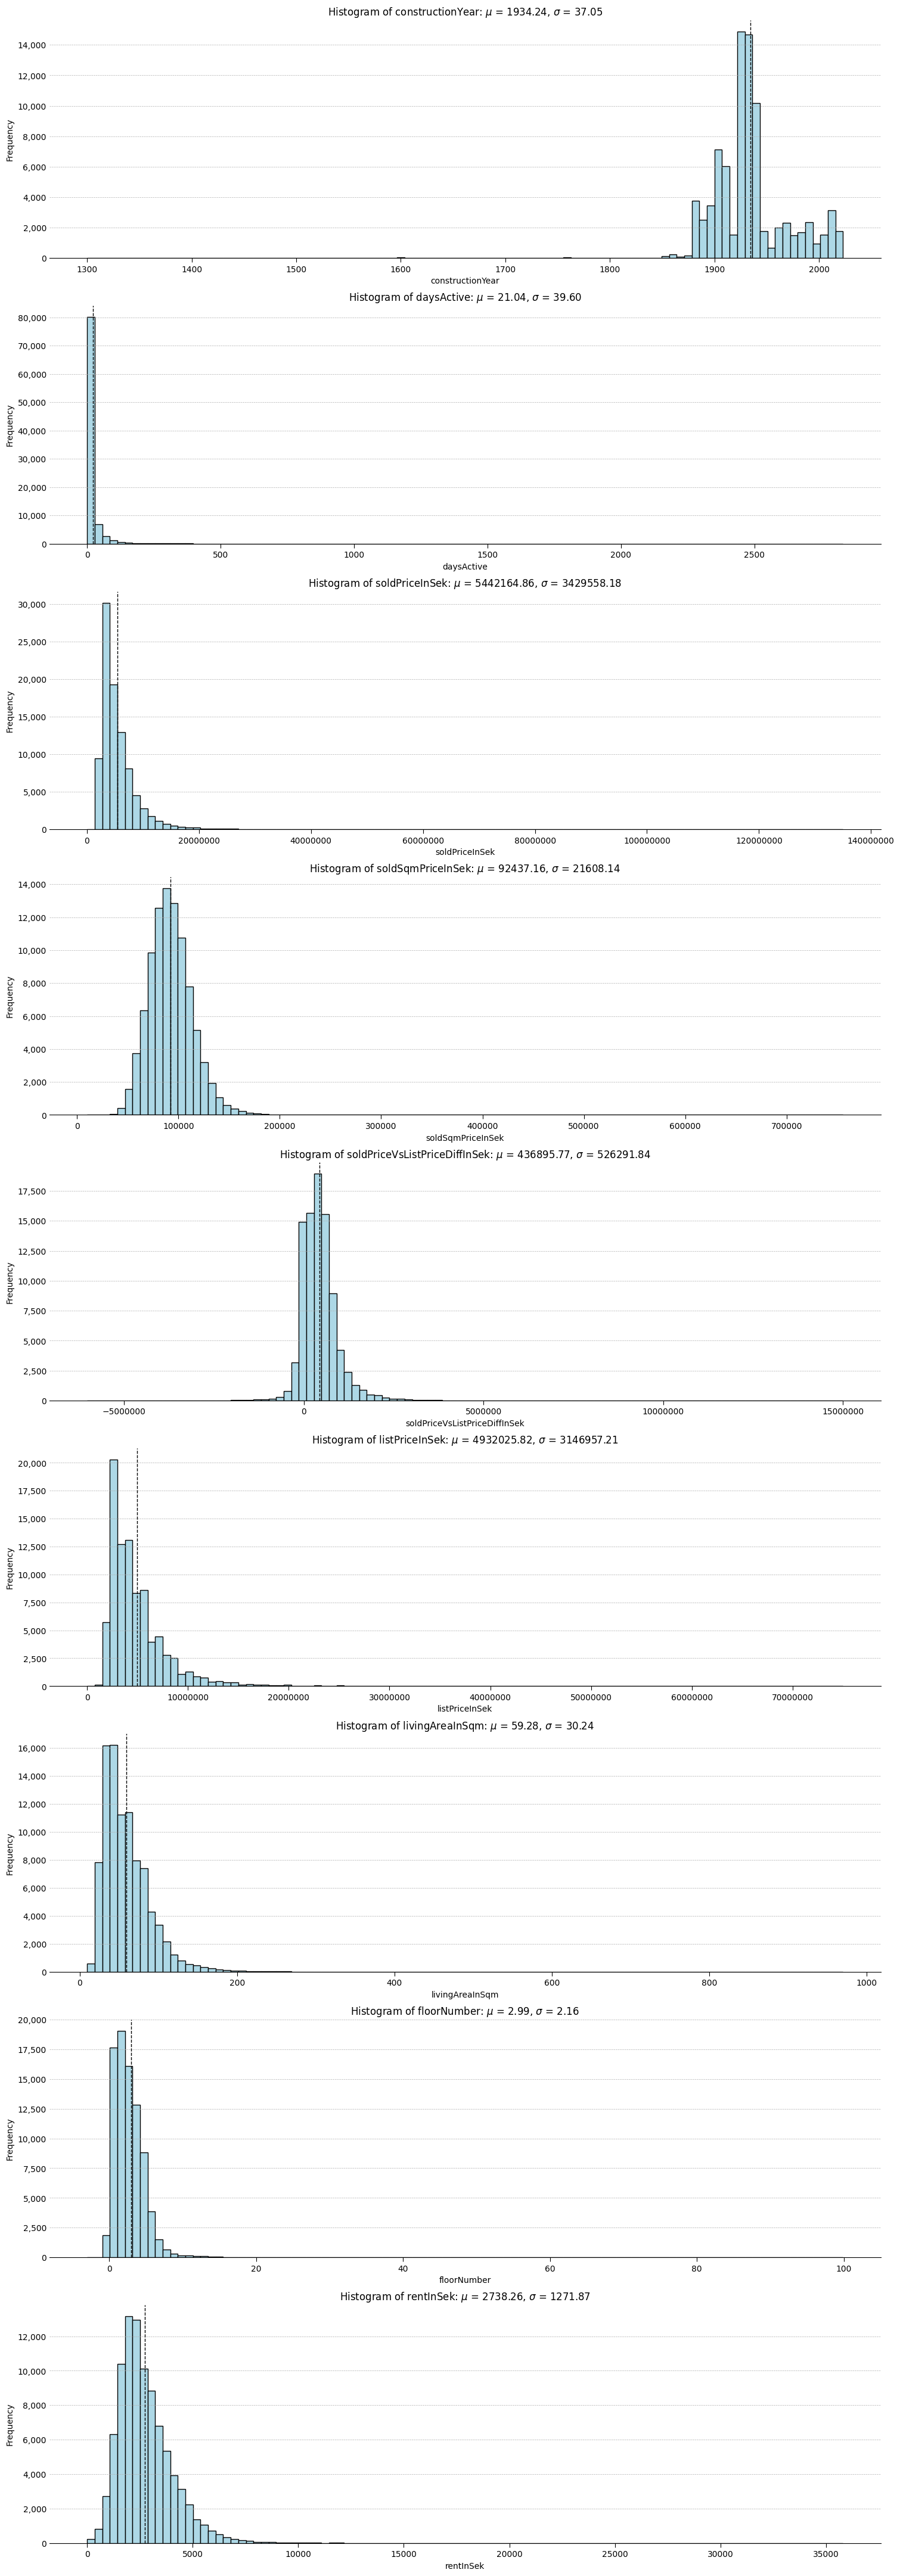

In [224]:
fig, axs = plt.subplots(nrows = 9, figsize = (18,55))

plot_distribution(df, "constructionYear", axs[0])
plot_distribution(df, "daysActive", axs[1])
plot_distribution(df, "soldPriceInSek", axs[2])
plot_distribution(df, "soldSqmPriceInSek", axs[3])
plot_distribution(df, "soldPriceVsListPriceDiffInSek", axs[4])
plot_distribution(df, "listPriceInSek", axs[5])
plot_distribution(df, "livingAreaInSqm", axs[6])
plot_distribution(df, "floorNumber", axs[7])
plot_distribution(df, "rentInSek", axs[8])

## Sold Date

In [225]:
def plot_dates(dataframe, date_col, measure_col, agg_func = "count"):
    if agg_func == "count":
        temp = dataframe[[date_col, measure_col]].set_index(date_col).groupby([pd.Grouper(freq = "M")]).count()
    elif agg_func == "sum":
        temp = dataframe[[date_col, measure_col]].set_index(date_col).groupby([pd.Grouper(freq = "M")]).sum()
    elif agg_func == "mean":
        temp = dataframe[[date_col, measure_col]].set_index(date_col).groupby([pd.Grouper(freq = "M")]).mean()
    else:
        return print("Choose a correct aggregation function")
        
    ax = temp.plot(kind = "line", figsize = (25, 10))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    plt.show()

### Sold Objects

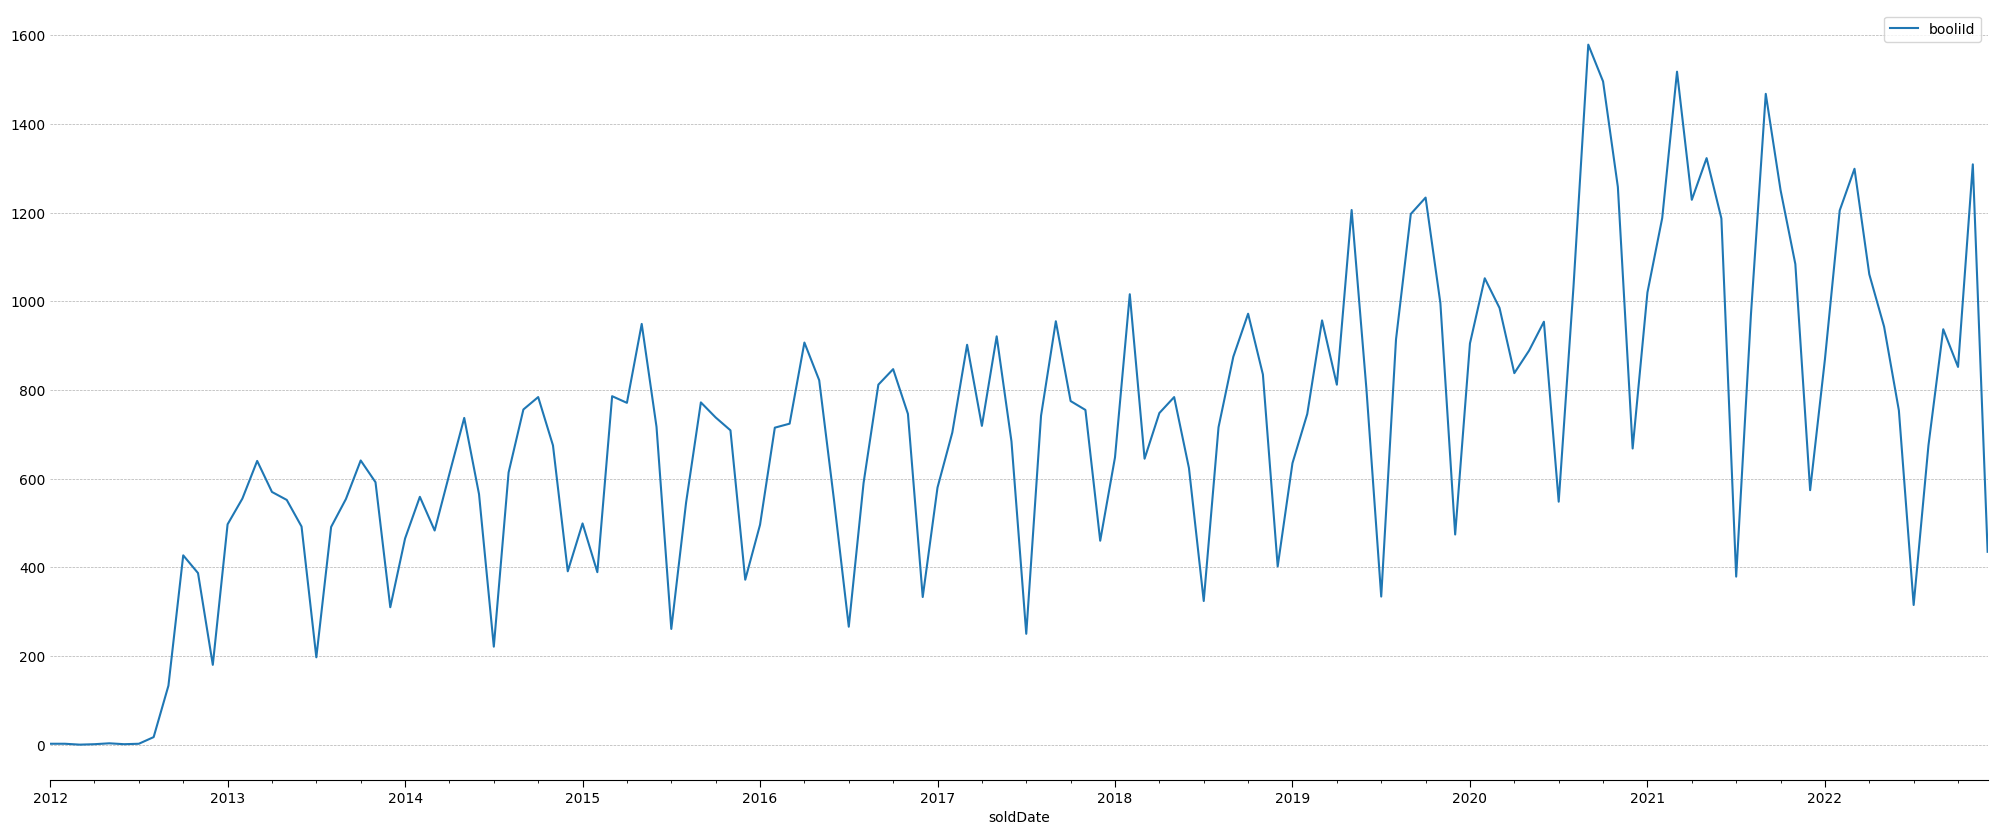

In [226]:
df["soldDate"] = pd.to_datetime(df["soldDate"], format = "%Y-%m-%d")
plot_dates(df, "soldDate", "booliId", "count")

### Mean Days Active

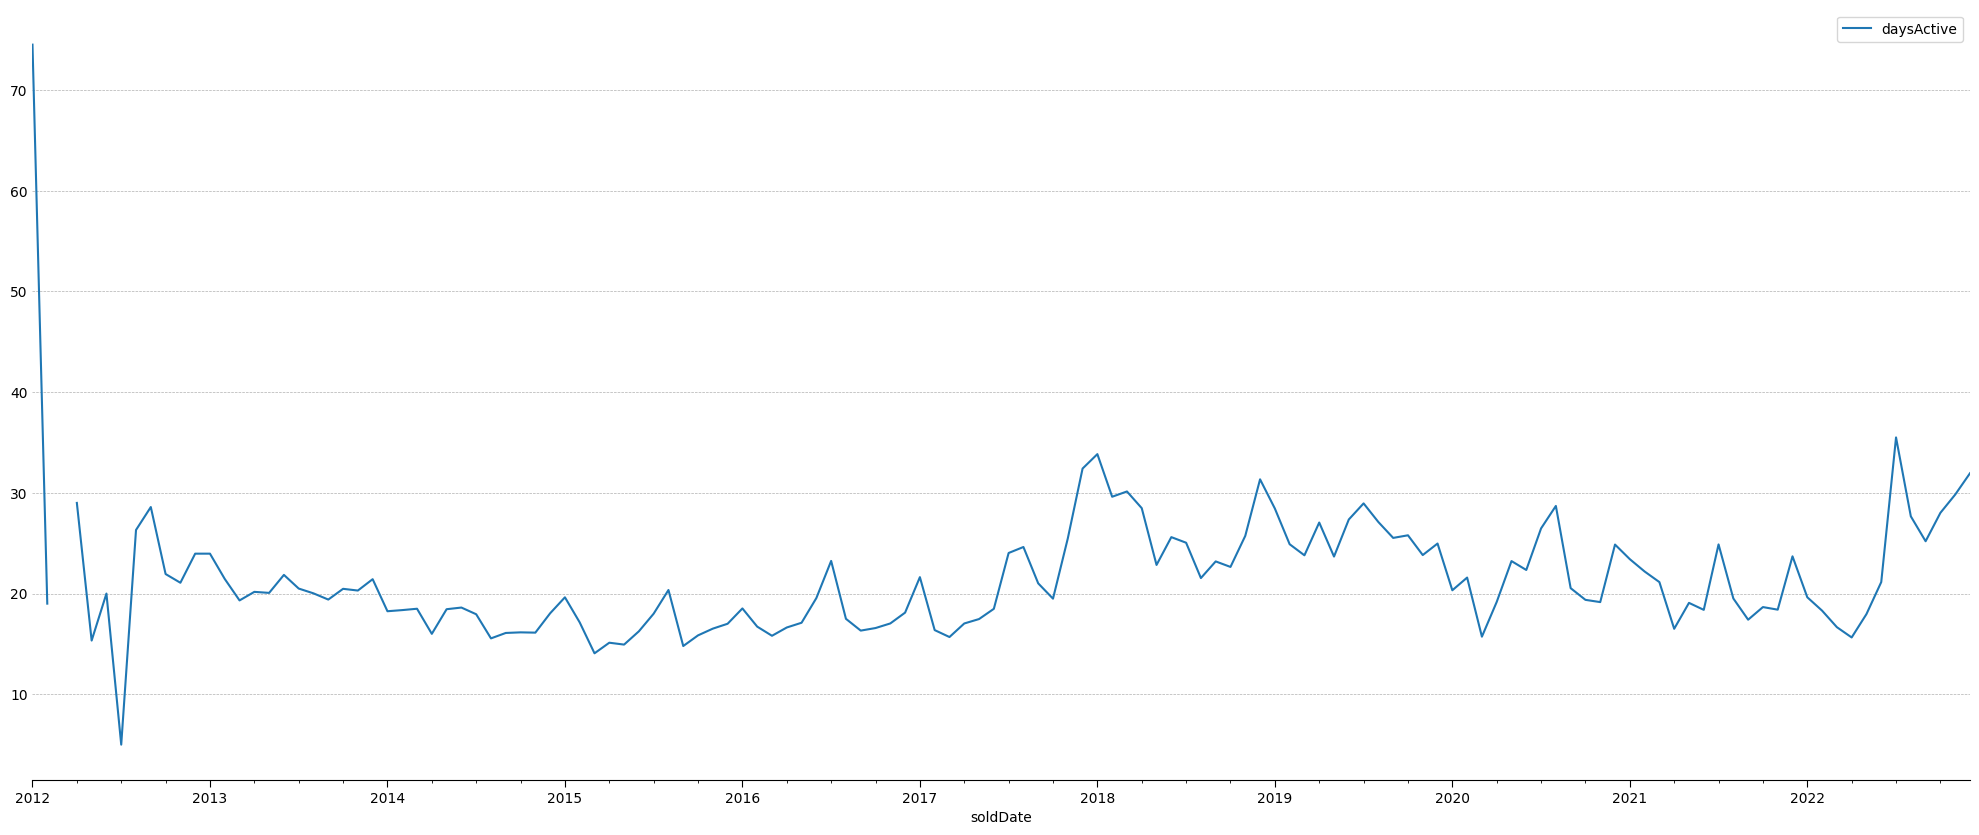

In [227]:
plot_dates(df, "soldDate", "daysActive", "mean")

### Mean Sold Sqm Price in Sek

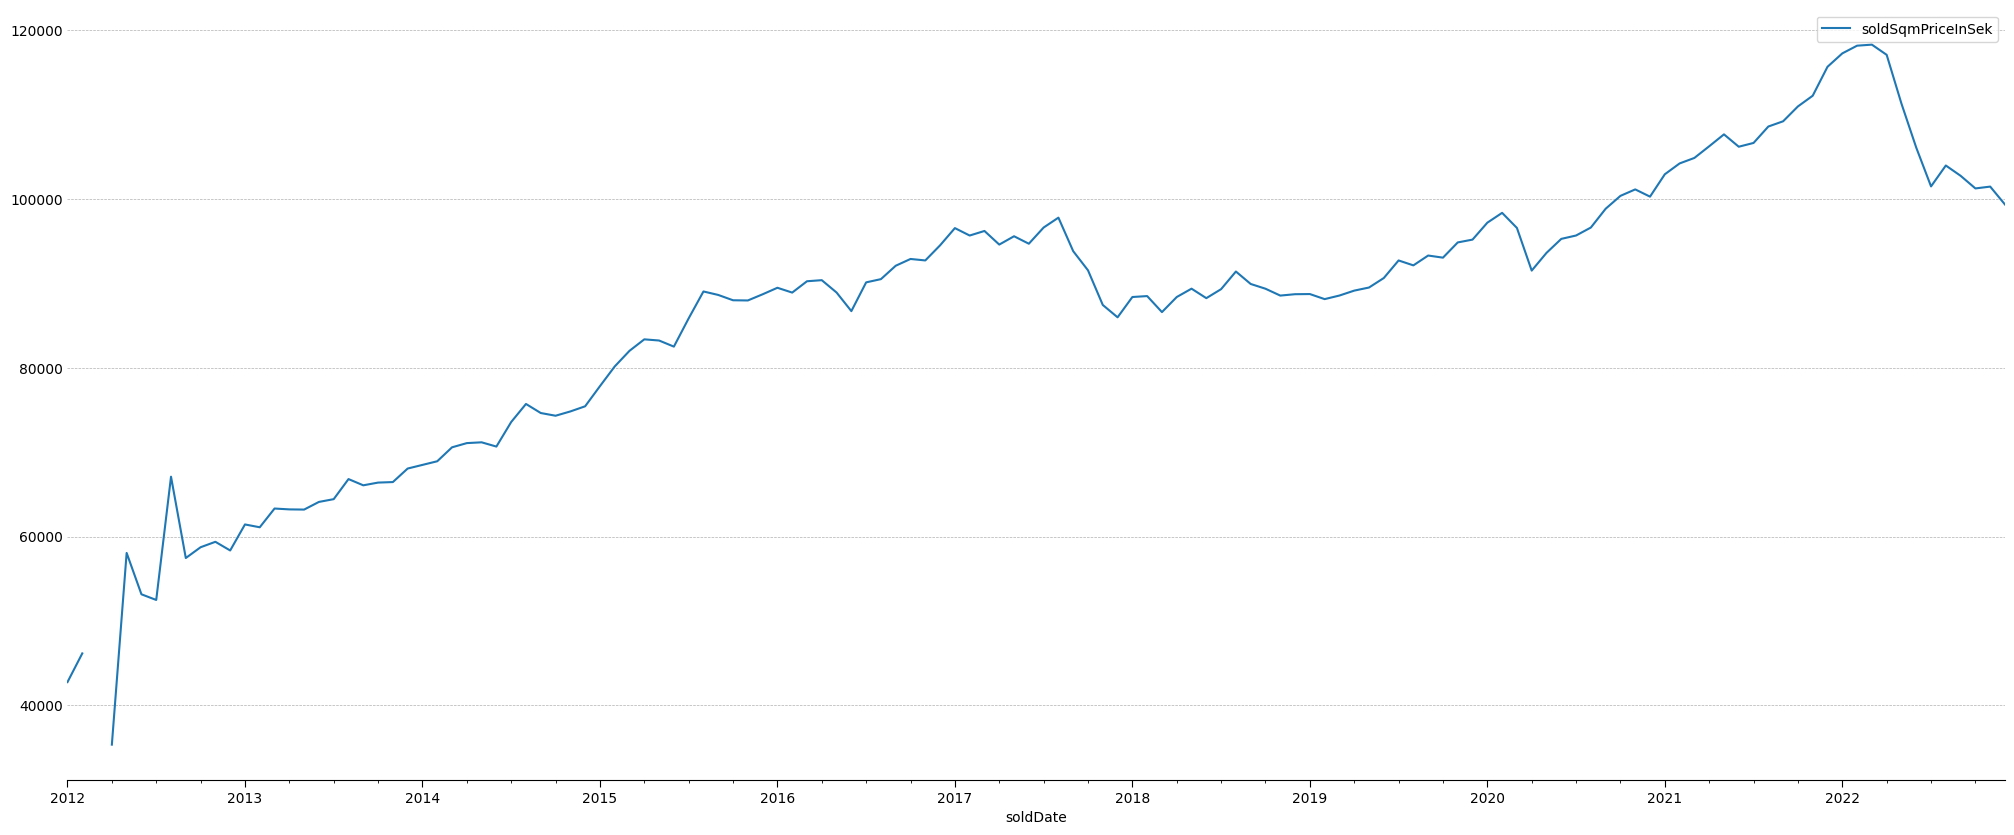

In [228]:
plot_dates(df, "soldDate", "soldSqmPriceInSek", "mean")

### Mean Sold Sqm Price in Sek per Number of Rooms

<AxesSubplot: xlabel='soldDate'>

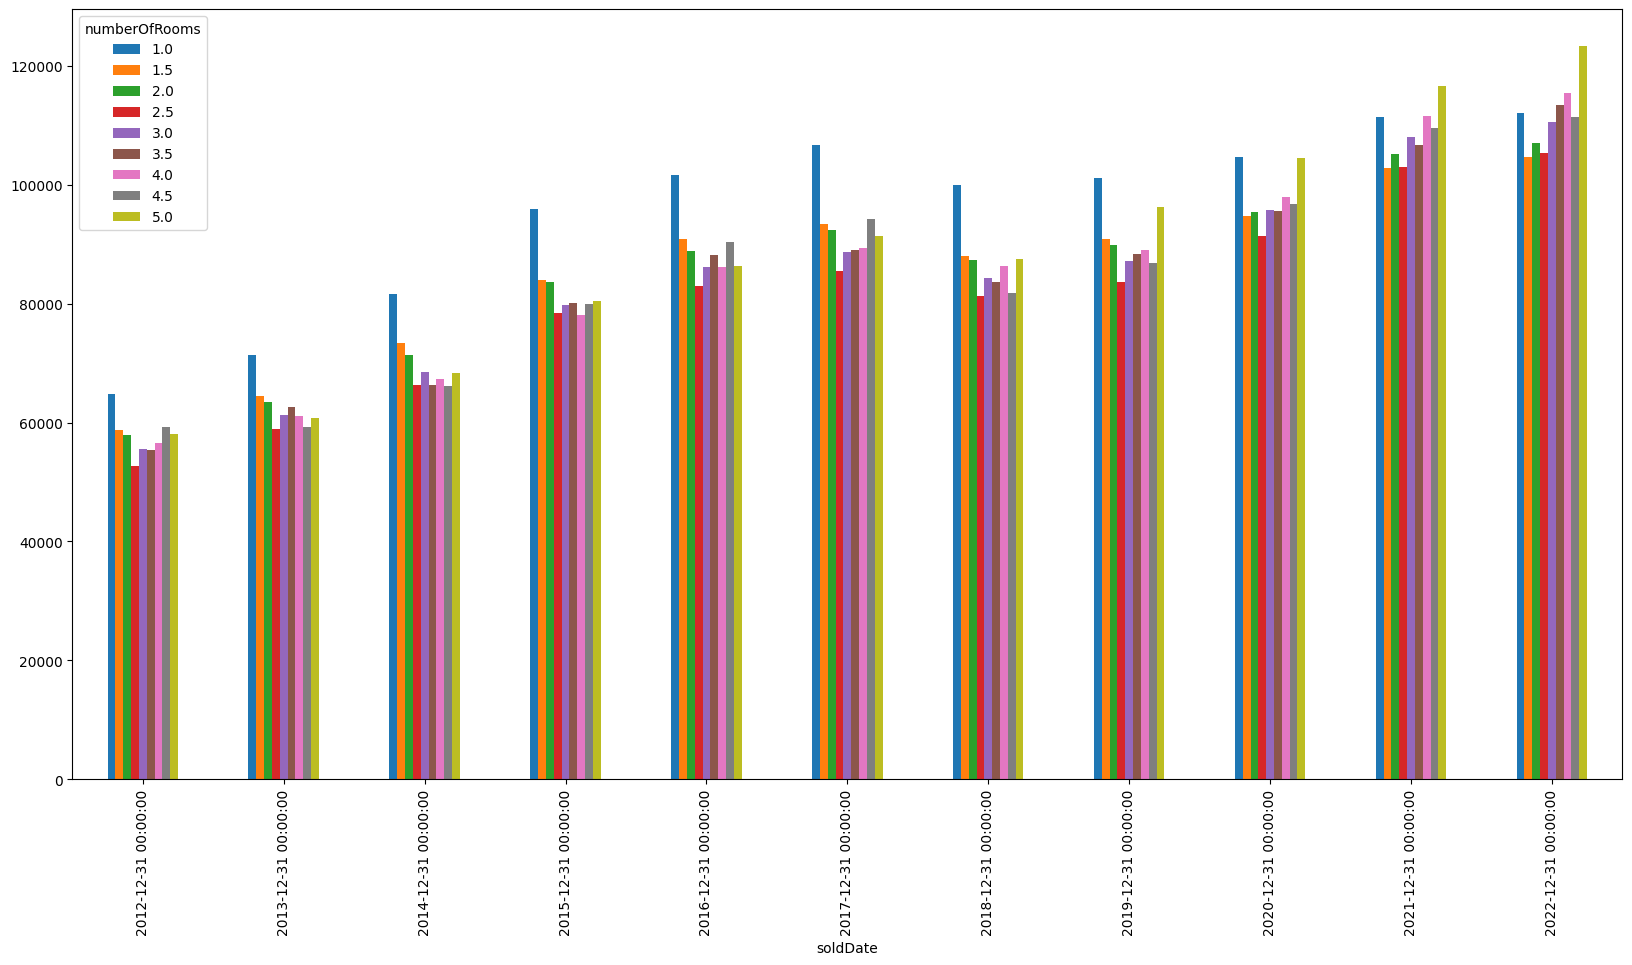

In [229]:
df_sqm_rooms = df[["soldDate", "soldSqmPriceInSek", "numberOfRooms"]].set_index("soldDate").groupby([pd.Grouper(freq = "Y"), "numberOfRooms"])["soldSqmPriceInSek"].mean().reset_index()
df_sqm_rooms = df_sqm_rooms[df_sqm_rooms.numberOfRooms <= 5]
df_sqm_rooms.pivot(index = "soldDate", columns = "numberOfRooms", values = "soldSqmPriceInSek").plot(kind = "bar", figsize = (20, 10))

### Monthly Average Sqm Price in Sek Per Descriptive Area Name

In [230]:
df[["descriptiveAreaName", "booliId"]].groupby(["descriptiveAreaName"]).count().sort_values(by = "booliId", ascending = False).head(30)

,booliId
descriptiveAreaName,
Vasastan,18102
Kungsholmen,17276
Södermalm,15440
Östermalm,10134
Gärdet,3909
Katarina,1433
Södermalm Katarina,1066
Essingeöarna,1013
Norrmalm,949


In [231]:
df_area_price = df[["soldDate", "descriptiveAreaName", "soldSqmPriceInSek"]].set_index("soldDate")
df_area_price = df_area_price[df_area_price.descriptiveAreaName.isin(["Vasastan", "Kungsholmen", "Södermalm", "Östermalm"])]
df_area_price = df_area_price[df_area_price.index >= "2012-12-31"]
df_area_price = df_area_price.groupby([pd.Grouper(freq = "M"), "descriptiveAreaName"]).mean().reset_index()
df_area_price = df_area_price.pivot(index = "soldDate", columns = "descriptiveAreaName", values = "soldSqmPriceInSek")
df_area_price["Mean"] = df_area_price.mean(axis = 1)

In [232]:
df_area_price.reset_index().head()

descriptiveAreaName,soldDate,Kungsholmen,Södermalm,Vasastan,Östermalm,Mean
0,2013-01-31,59320.109756,60340.608108,66087.478261,66009.318182,62939.378577
1,2013-02-28,56972.075269,59304.747253,65676.434783,67216.384615,62292.410480
2,2013-03-31,61103.741071,61005.252874,66525.214953,70012.962963,64661.792965
3,2013-04-30,61214.252525,62196.533333,67286.456311,69905.116279,65150.589612
4,2013-05-31,62088.827957,61526.765432,65177.415584,72397.000000,65297.502243


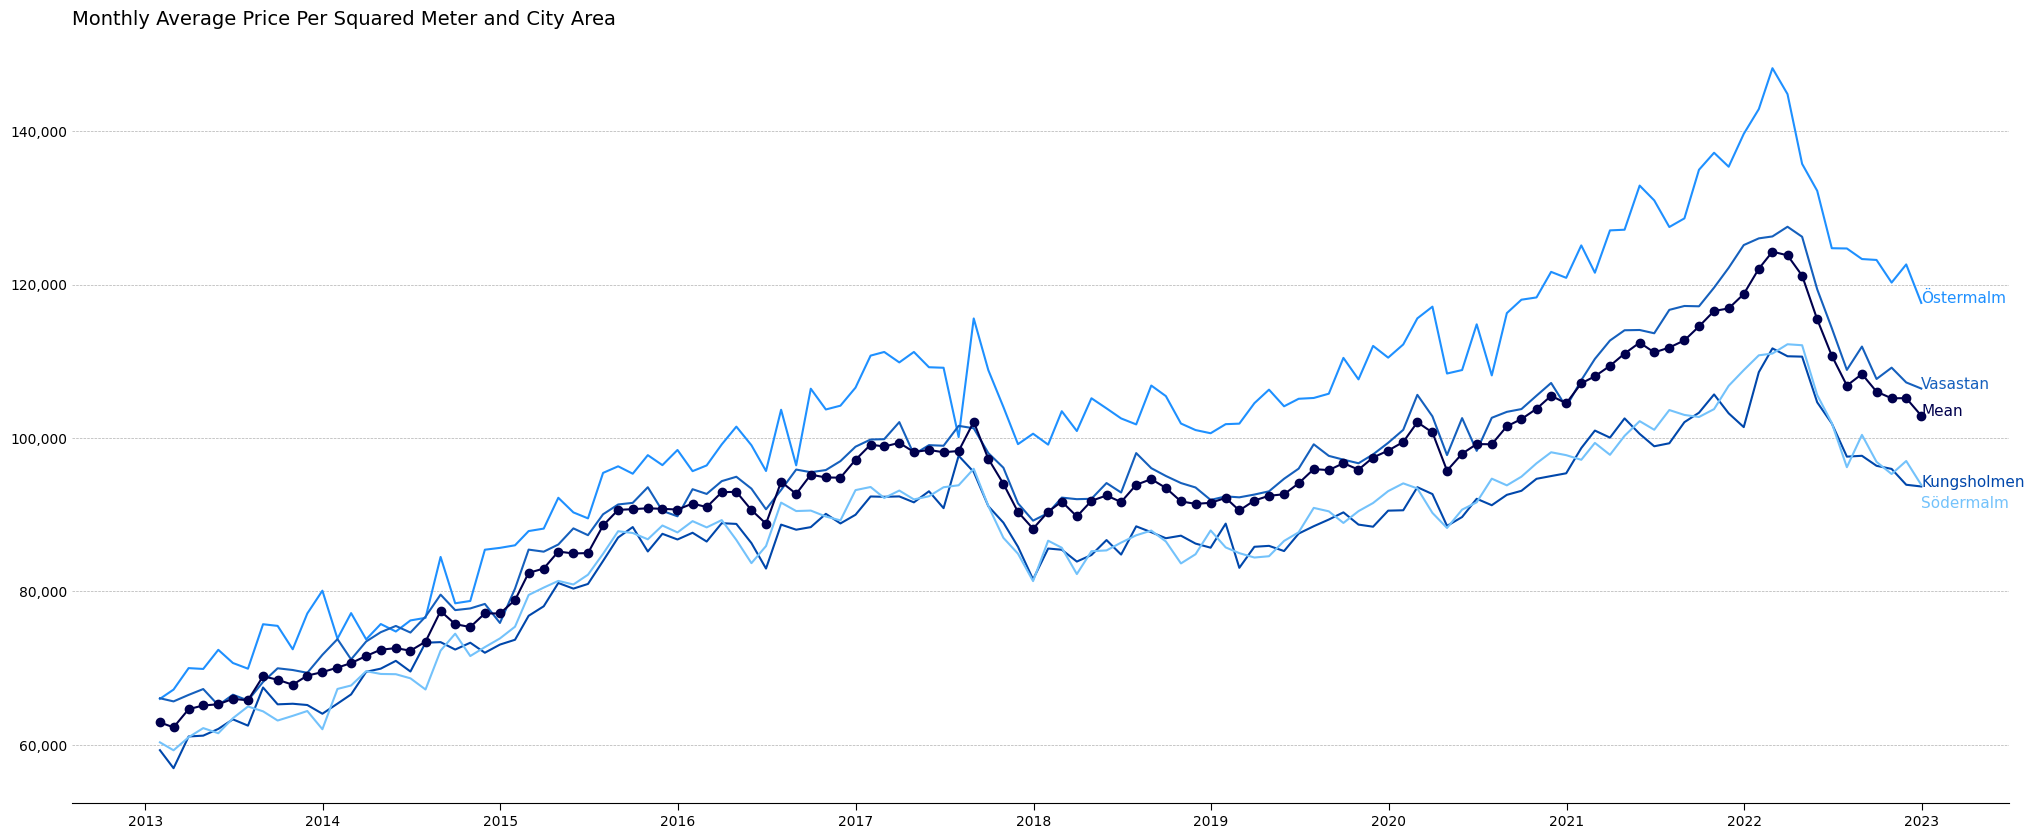

In [233]:
def plot_sqm_price_per_date(dataframe, ax):
    
    color_tableau = {
        "Kungsholmen": "#0047ab",
        "Östermalm": "#1E90FF",
        "Södermalm": "#73c2fb",
        "Vasastan": "#1560BD",
        "Mean": "#00004d"
    }
    
    temp = dataframe

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    for area, color in color_tableau.items():
        if area == "Mean":
            plt.plot(temp["soldDate"].values, 
                    temp[area].values, 
                    lw = 1.5,
                    linestyle = "-",
                    marker = "o",
                    color = color)
        else:
            plt.plot(temp["soldDate"].values, 
                    temp[area].values, 
                    lw = 1.5, 
                    color = color)
            
        y_pos = temp[area].values[-1] - 0.5
        if area == "Södermalm":    
            y_pos += -3000
            
        plt.text(temp.soldDate.max(), y_pos, area, fontsize = 11, color = color) 
            
    ax.set_title("Monthly Average Price Per Squared Meter and City Area", loc = "left", fontsize = 14)



plt.figure(figsize = (25, 10))
ax = plt.subplot(111)
plot_sqm_price_per_date(df_area_price.reset_index(), ax)




### Weighted Average

We are weighting 3 data points, the trailing data point, actual data point and leading data point with its corresponding weight. 
$$ WMA_{t} = \frac{w_{t-1} \cdot x_{t-1} + w_{t} \cdot x_{t} + w_{t+1} \cdot x_{t+1}}{w_{t-1} + w_{t} + w_{t+1}}$$

In [234]:
def plot_weighted_average(dataframe, ax):
    
    color_tableau = {
        "weightedAveragePriceInSek": "#00004d"
    }
    
    temp = dataframe
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    for area, color in color_tableau.items():
        if area == "weightedAveragePriceInSek":
            ax.plot(temp["soldDate"].values, 
                    temp[area].values, 
                    lw = 1.5,
                    linestyle = "-",
                    marker = "o",
                    color = color)
                  
        y_pos = temp[area].values[-1] - 1
            
        plt.text(temp.soldDate.max(), y_pos, area, fontsize = 11, color = color) 
            
    ax.set_title("Sold Sqm Price In Sek Weighted By Number of Objects Sold", loc = "left", fontsize = 14)

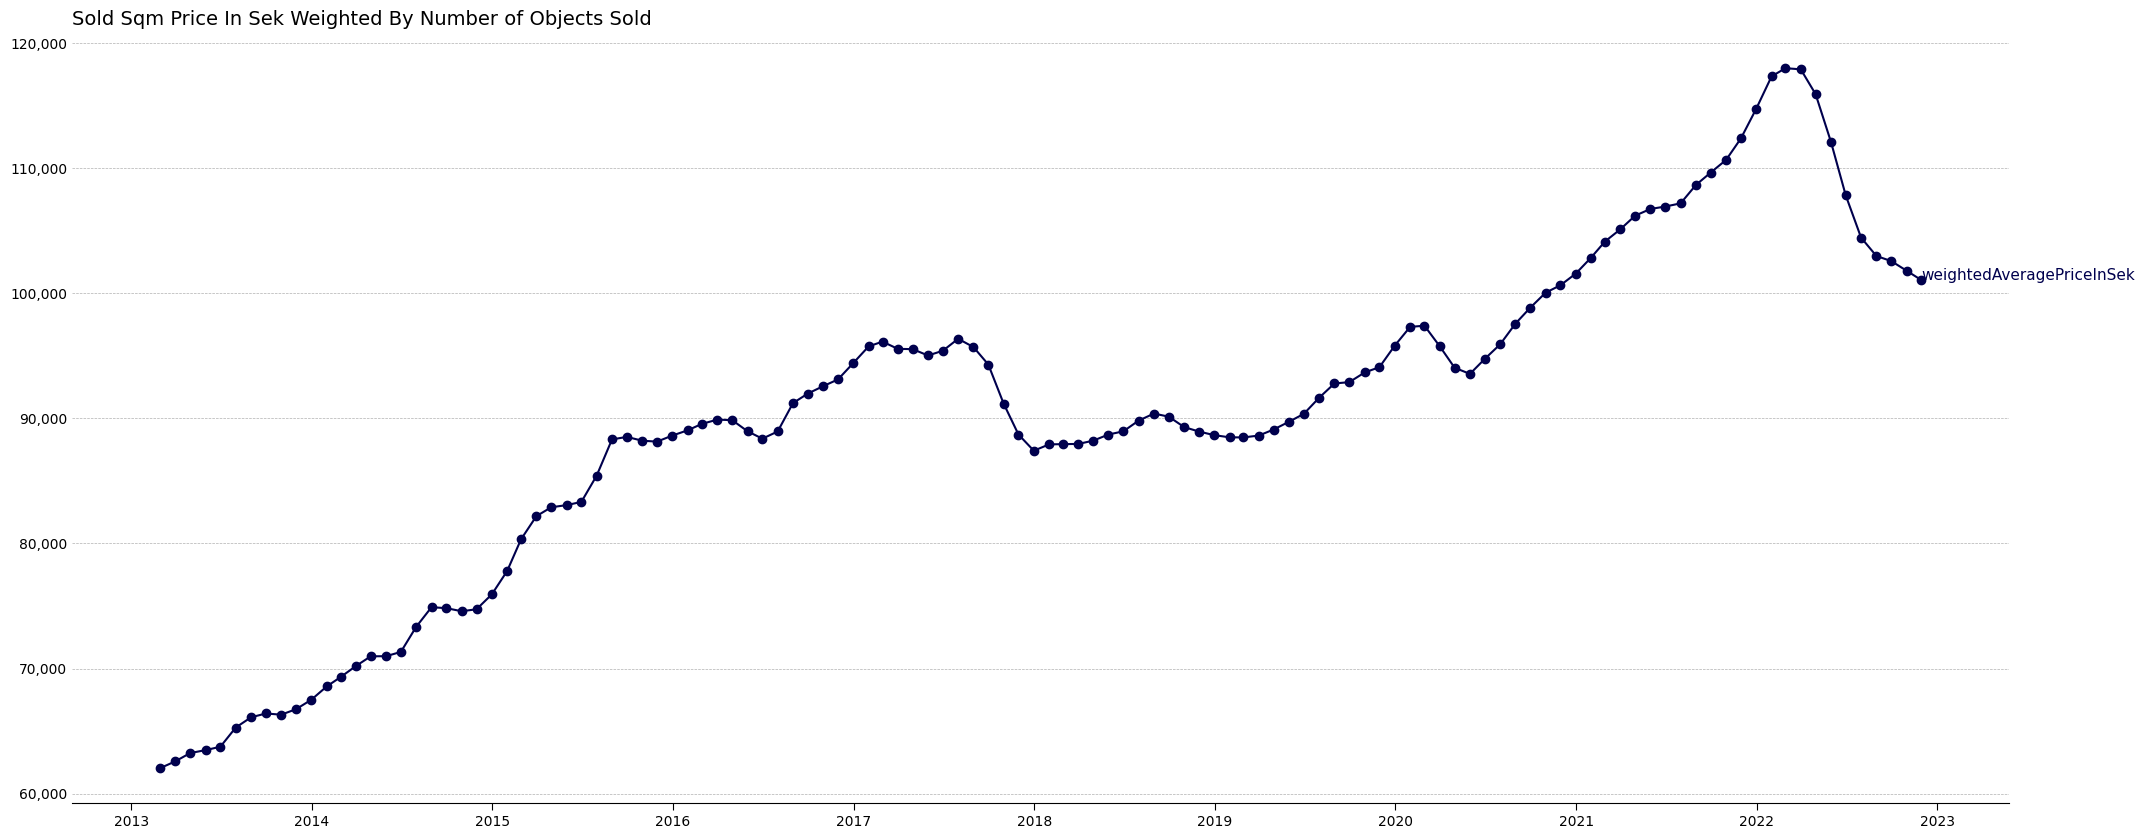

In [235]:
df_weighted_average = df.reset_index()[["soldDate", "booliId", "soldSqmPriceInSek"]].set_index("soldDate")
df_weighted_average = df_weighted_average[df_weighted_average.index >= "2012-12-31"]
df_weighted_average = df_weighted_average.groupby([pd.Grouper(freq = "M")]).agg({"booliId": "count", "soldSqmPriceInSek": "mean"}).rename(columns = {"booliId": "NumberOfSoldObjects", "soldSqmPriceInSek": "averagePriceInSek"})

for i in range(0, df_weighted_average.shape[0] - 2):
    df_weighted_average.loc[df_weighted_average.index[i + 1], "weightedAveragePriceInSek"] = np.round((
                                                                            df_weighted_average.iloc[i, 0] * df_weighted_average.iloc[i, 1] + 
                                                                            df_weighted_average.iloc[i + 1, 0] * df_weighted_average.iloc[i + 1, 1] + 
                                                                            df_weighted_average.iloc[i + 2, 0] * df_weighted_average.iloc[i + 2, 1]
                                                                        ) / (df_weighted_average.iloc[i, 0] + df_weighted_average.iloc[i + 1, 0] + df_weighted_average.iloc[i + 2, 0]), 1)
    
plt.figure(figsize = (25, 10))
ax = plt.subplot(111)
plot_weighted_average(df_weighted_average[:-1].reset_index(), ax)

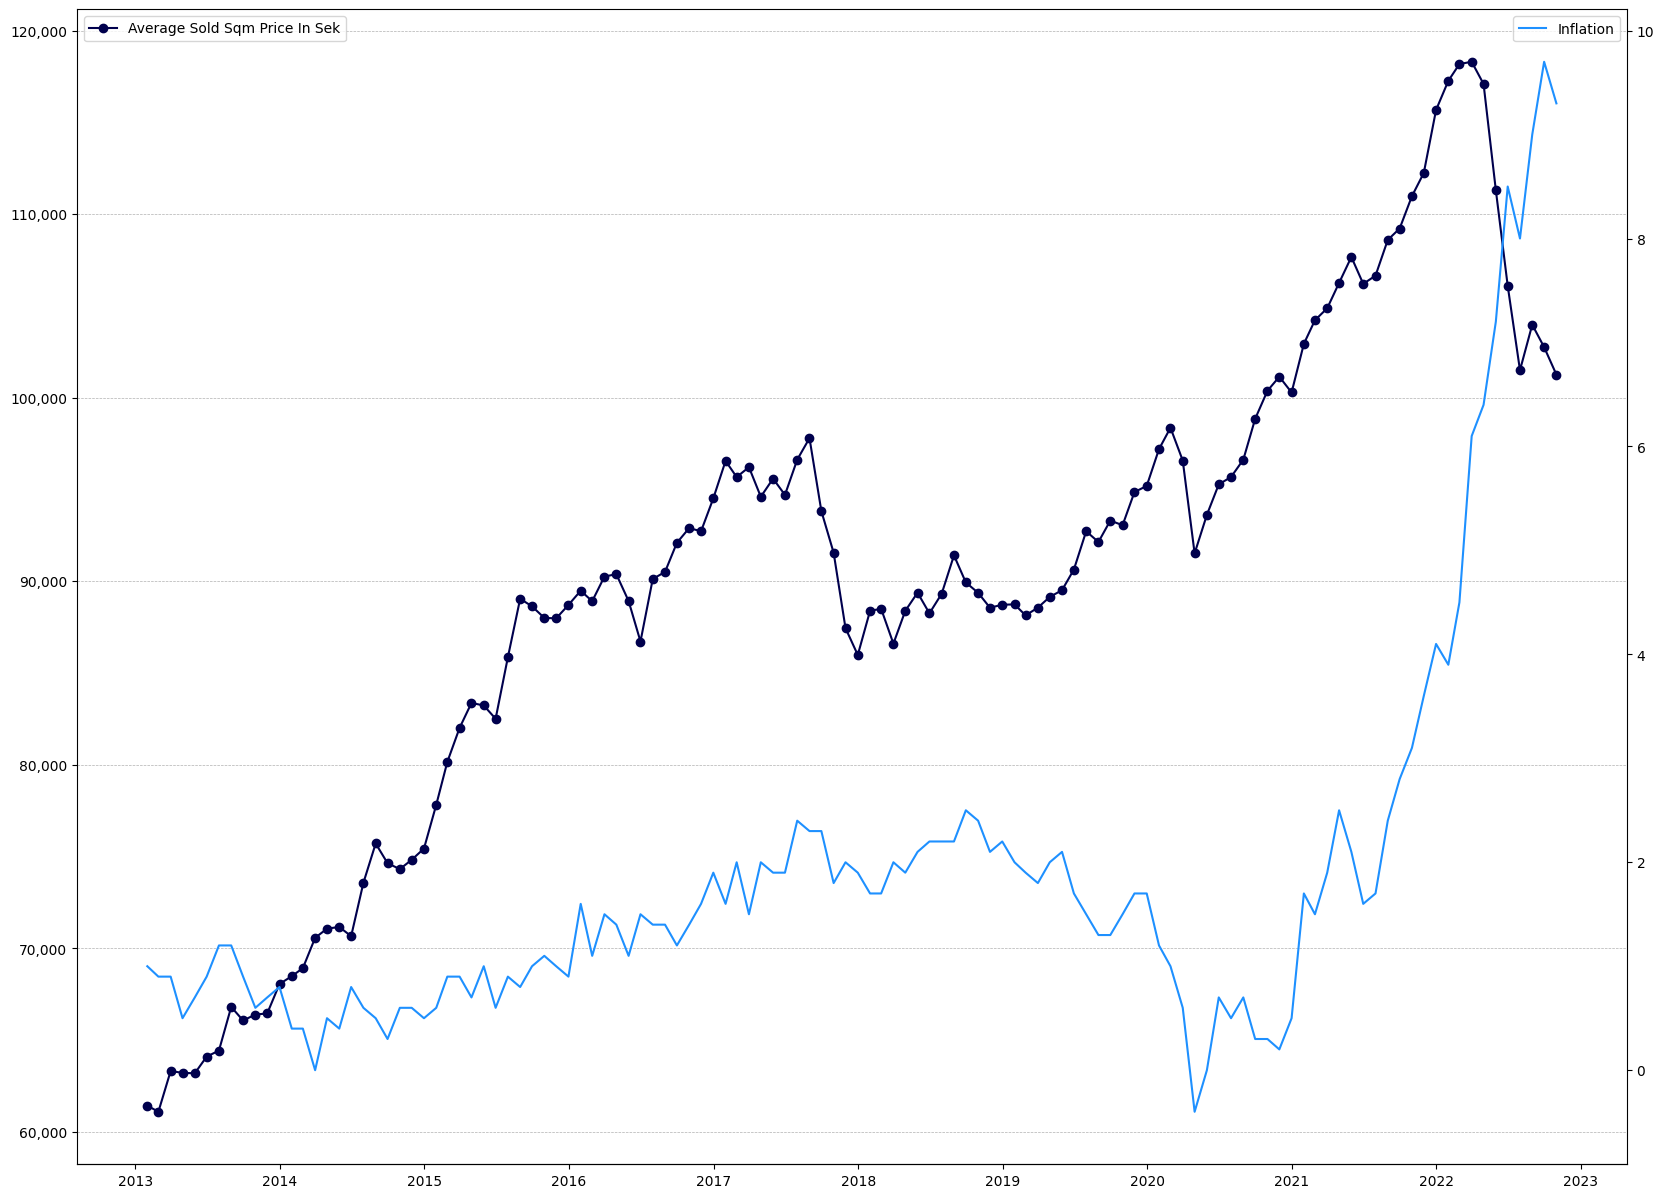

In [330]:
df_inflation_corr = df.reset_index()[["soldDate", "soldSqmPriceInSek", "CPIF"]].set_index("soldDate")
df_inflation_corr = df_inflation_corr[df_inflation_corr.index >= "2012-12-31"]
df_inflation_corr = df_inflation_corr.groupby([pd.Grouper(freq = "M")]).agg({"CPIF": "mean", "soldSqmPriceInSek": "mean"}).rename(columns = {"soldSqmPriceInSek": "averagePriceInSek"})
df_inflation_corr = df_inflation_corr[:-2]

fig, ax = plt.subplots(figsize = (20, 15))
ax2 = ax.twinx()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)

ax.plot(df_inflation_corr.averagePriceInSek, color = "#00004d", marker = "o")
ax2.plot(df_inflation_corr.CPIF, color = "#1E90FF")
ax.legend(["Average Sold Sqm Price In Sek"], loc = "upper left")
ax2.legend(["Inflation"])

In [236]:
df_monthly_average = df.set_index("soldDate").groupby([pd.Grouper(freq = "M"), "descriptiveAreaName"])["soldSqmPriceInSek"].mean().reset_index()
df_ac = df_monthly_average[df_monthly_average.soldDate == "2022-11-30"][["descriptiveAreaName", "soldSqmPriceInSek"]].rename(columns = {"descriptiveAreaName": "Area", "soldSqmPriceInSek": "AC"})
df_ytd = df_monthly_average[df_monthly_average.soldDate == "2022-01-31"][["descriptiveAreaName", "soldSqmPriceInSek"]].rename(columns = {"descriptiveAreaName": "Area", "soldSqmPriceInSek": "YE start"})
df_py = df_monthly_average[df_monthly_average.soldDate == "2021-11-30"][["descriptiveAreaName", "soldSqmPriceInSek"]].rename(columns = {"descriptiveAreaName": "Area", "soldSqmPriceInSek": "PY"})

df_result = pd.merge(pd.merge(df_ac, df_ytd, on = "Area"), df_py, on = "Area")
df_result["AC vs PY"] = ((df_result.AC - df_result.PY) / df_result.PY) * 100
(df_result.style.format(precision = 0, formatter = {("AC vs PY"): lambda x: "{:,.1f}%".format(x) }))

,Area,AC,YE start,PY,AC vs PY
0,Birkastan,108461,122108,120256,-9.8%
1,Centrum,98686,101447,128605,-23.3%
2,Ekhagen,58945,89897,77401,-23.8%
3,Essingeöarna,75685,91768,80642,-6.1%
4,Fredhäll,84899,101580,96292,-11.8%
5,Fridhemsplan,88684,102597,94274,-5.9%
6,Gamla Stan,117848,125309,113081,4.2%
7,Gärdet,96424,114940,104972,-8.1%
8,Hagastaden,108965,145754,148731,-26.7%
9,Hjorthagen,79919,86323,82397,-3.0%


# 5. Data Cleaning

## Drop nan Columns

In [237]:
def get_nan_per_column(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(len(df))
    print('\n')
    print(missing_data)


get_nan_per_column(df)

92820


                                      Total   Percent
floorNumber                            9206  0.099181
constructionYear                       8192  0.088257
soldPriceVsListPriceDiffInPercentage   3421  0.036856
soldPriceVsListPriceDiffInSek          3421  0.036856
listPriceInSek                         3408  0.036716
rentInSek                              1052  0.011334
daysActive                              554  0.005969
numberOfRooms                           247  0.002661
livingAreaInSqm                         143  0.001541
soldSqmPriceInSek                       143  0.001541
soldPriceInSek                            0  0.000000
booliId                                   0  0.000000
streetAddress                             0  0.000000
longitude                                 0  0.000000
latitude                                  0  0.000000
soldDate                                  0  0.000000
soldPriceType                             0  0.000000
descriptiveAreaName 

In [238]:
df = df.dropna()
get_nan_per_column(df)

73100


                                      Total  Percent
booliId                                   0      0.0
streetAddress                             0      0.0
numberOfRooms                             0      0.0
livingAreaInSqm                           0      0.0
listPriceInSek                            0      0.0
soldPriceVsListPriceDiffInPercentage      0      0.0
soldPriceVsListPriceDiffInSek             0      0.0
soldSqmPriceInSek                         0      0.0
rentInSek                                 0      0.0
soldPriceInSek                            0      0.0
url                                       0      0.0
longitude                                 0      0.0
latitude                                  0      0.0
soldDate                                  0      0.0
daysActive                                0      0.0
soldPriceType                             0      0.0
descriptiveAreaName                       0      0.0
objectType                            

## Drop Dates with Few Data Points

In [239]:
df[["soldDate", "booliId"]].set_index("soldDate").groupby([pd.Grouper(freq = "M")])["booliId"].count().reset_index().sort_values("soldDate", ascending = True).head(30)


,soldDate,booliId
0,2012-05-31,1
1,2012-06-30,1
2,2012-07-31,0
3,2012-08-31,10
4,2012-09-30,67
5,2012-10-31,154
6,2012-11-30,149
7,2012-12-31,68
8,2013-01-31,189
9,2013-02-28,250


In [240]:
df = df[df.soldDate >= "2012-09-30"]
df = df.set_index("booliId")
df.sort_values("soldDate", ascending = True).head(30)

,streetAddress,constructionYear,objectType,descriptiveAreaName,soldPriceType,daysActive,soldDate,latitude,longitude,url,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
booliId,,,,,,,,,,,,,,,,,,,
1273715,Strålgatan 23,1938.0,Lägenhet,Kungsholmen,Sista bud,12.0,2012-09-30,59.324080,18.005720,/bostad/752081,1600000,2259.0,50000.0,100000.0,6.7,1500000.0,32.0,1.0,3.0
1181045,Tulegatan 5B,1891.0,Lägenhet,Vasastan,Sista bud,17.0,2012-09-30,59.341318,18.062897,/annons/1181045,6425000,7141.0,53099.0,25000.0,0.4,6400000.0,121.0,4.0,4.0
1263985,Bysistorget 6,1932.0,Lägenhet,Södermalm,Sista bud,24.0,2012-09-30,59.318382,18.055773,/annons/1263985,2600000,1841.0,59908.0,5000.0,0.2,2595000.0,43.4,2.0,2.0
1270221,Birkagatan 4,1927.0,Lägenhet,Vasastan,Sista bud,17.0,2012-09-30,59.339253,18.032454,/bostad/582830,3470000,2226.0,73830.0,375000.0,12.1,3095000.0,47.0,2.0,3.0
1270454,Birger Jarlsgatan 111C,1906.0,Lägenhet,Vasastan,Sista bud,16.0,2012-09-30,59.348773,18.058659,/annons/1270454,3550000,2369.0,61207.0,50000.0,1.4,3500000.0,58.0,2.0,2.0
1271226,Essinge Brogata 22,1939.0,Lägenhet,Kungsholmen,Sista bud,16.0,2012-09-30,59.325085,18.004440,/annons/1271226,1320000,2109.0,44000.0,25000.0,1.9,1295000.0,30.0,1.0,1.0
1265007,Observatoriegatan 9,1881.0,Lägenhet,Vasastan,Sista bud,24.0,2012-10-01,59.340581,18.051606,/annons/1265007,3400000,3065.0,57627.0,-200000.0,-5.6,3600000.0,59.0,2.0,2.0
1272464,Upplandsgatan 19B,1887.0,Lägenhet,Vasastan,Sista bud,16.0,2012-10-02,59.338388,18.052430,/annons/1272464,5000000,4230.0,59524.0,-500000.0,-9.1,5500000.0,84.0,2.0,4.0
1271147,Kungstensgatan 29,1899.0,Lägenhet,Tule,Sista bud,18.0,2012-10-02,59.341827,18.059843,/annons/1271147,7450000,4307.0,62605.0,0.0,0.0,7450000.0,119.0,4.0,1.0


# 6. Saving Cleaned Data to Pickle

In [241]:
# parquet_file = df.to_parquet(index = False)
# azure_utils.upload_csv_to_datalake(df, f"silver/sold_clean", f"Sold_{date.today()}.csv")
df.to_pickle("cleaned.pkl")